[View in Colaboratory](https://colab.research.google.com/github/alvarogg777/colabCompression/blob/master/Compress_Lab3.ipynb)

In [1]:
from matplotlib import pyplot as plt
import numpy as np
!git clone https://github.com/alvarogg777/colabCompression.git
!mv colabCompression/*.ipynb . && rm -r colabCompression && jupyter nbconvert --to script *.ipynb && mv Compress_Lab1.txt lab1.py && mv Compress_Lab2.txt lab2.py && rm *.ipynb && ls

Cloning into 'colabCompression'...
remote: Enumerating objects: 79, done.
remote: Counting objects: 100% (79/79), done.
remote: Compressing objects: 100% (77/77), done.
remote: Total 79 (delta 47), reused 3 (delta 0), pack-reused 0
Unpacking objects: 100% (79/79), done.
[NbConvertApp] Converting notebook Compress_Lab1.ipynb to script
[NbConvertApp] Writing 3200 bytes to Compress_Lab1.txt
[NbConvertApp] Converting notebook Compress_Lab2.ipynb to script
[NbConvertApp] Writing 4549 bytes to Compress_Lab2.txt
[NbConvertApp] Converting notebook Compress_Lab3.ipynb to script
[NbConvertApp] Writing 4352 bytes to Compress_Lab3.txt
Compress_Lab3.txt  lab2.py  lena512.bmp  sample_data
lab1.py		   lab3.py  __pycache__


In [0]:
# import lab1, lab2
from lab1 import lena,quantizer,dequantizer,shannonEntropy
from lab2 import reverse_haar_multilevel,haar_multilevel

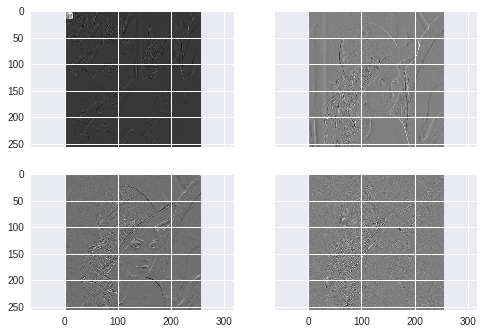

In [3]:
haarLena=haar_multilevel(lena,5)
ll2 = haarLena[0:128,0:128]
lh2 = haarLena[0:128,128:256]
hl2 = haarLena[128:256,0:128]
hh2 = haarLena[128:256,128:256]
lh1 = haarLena[0:256,256:512]
hl1 = haarLena[256:512,0:256]
hh1 = haarLena[256:512,256:512]
f,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,frameon=False,sharex=True,sharey=True)
ax1.imshow(haarLena[0:256,0:256],cmap='gray')#([ll2+lh2],[hl2+hh2])
ax2.imshow(lh1,cmap='gray')
ax3.imshow(hl1,cmap='gray')
ax4.imshow(hh1,cmap='gray')

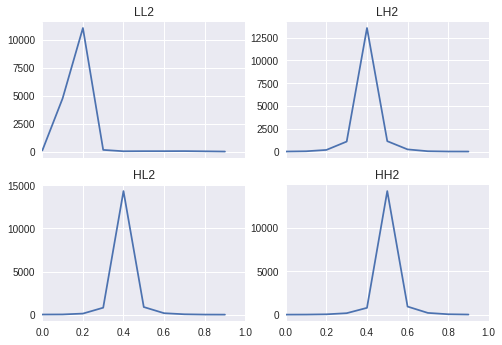

In [4]:
def normalize(input_matrix):
  scale=lambda x: (x-np.min(input_matrix))/(np.max(input_matrix)-np.min(input_matrix))
  return scale(input_matrix)
ll2_norm=normalize(ll2)
lh2_norm=normalize(lh2)
hl2_norm=normalize(hl2)
hh2_norm=normalize(hh2)
lh1_norm=normalize(lh1)
hl1_norm=normalize(hl1)
hh1_norm=normalize(hh1)
# count,bins=np.histogram(normalize(ll2))
# plt.xlim([0,1])
# plt.plot(bins[:-1],count)
f,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,frameon=False,sharex=True,sharey=False)
# ax1.xlim([0,1])
ax1.set_title('LL2')
ax1.set_xlim([0,1])
count,bins=np.histogram(ll2_norm)
ax1.plot(bins[:-1],count)

ax2.set_title('LH2')
ax2.set_xlim([0,1])
count,bins=np.histogram(lh2_norm)
ax2.plot(bins[:-1],count)

ax3.set_title('HL2')
ax3.set_xlim([0,1])
count,bins=np.histogram(hl2_norm)
ax3.plot(bins[:-1],count)

ax4.set_title('HH2')
ax4.set_xlim([0,1])
count,bins=np.histogram(hh2_norm)
ax4.plot(bins[:-1],count)

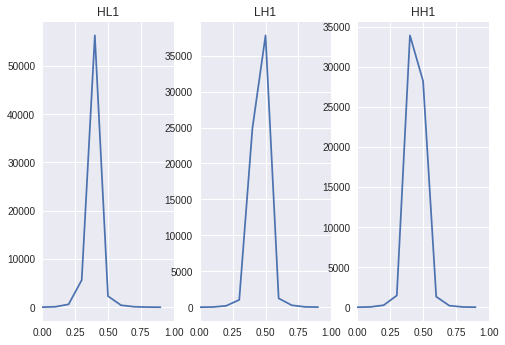

In [5]:
f,((ax1,ax2,ax3))=plt.subplots(1,3,frameon=False,sharex=True,sharey=False)
ax1.set_title('HL1')
ax1.set_xlim([0,1])
count,bins=np.histogram(hl1_norm)
ax1.plot(bins[:-1],count)

ax2.set_title('LH1')
ax2.set_xlim([0,1])
count,bins=np.histogram(lh1_norm)
ax2.plot(bins[:-1],count)

ax3.set_title('HH1')
ax3.set_xlim([0,1])
count,bins=np.histogram(hh1_norm)
ax3.plot(bins[:-1],count)

So having a look at the normal distributions ranging between 0 and 1, we see that closer subbands to the low frequency subband have more values than the farther ones, and the low frequency lowbband LL2 keeps closely the original image distribution. 

A non-uniform scalar quantizer may suit more fancy for quantizing the subbands as we should have more quantization steps on values closer to the center of their distribuitions. However, since we don't have one we'll stick the linear scalar quantizater.

Thus, keeping in mind to have more quantization steps on higher dispersions, we have chosen 7 bits to quantize HL2 and LH2, 6 to HH2,  5 to HL1 and LH1, and 4 to HH1.

In [6]:
lh2.shape

(128, 128)

In [0]:
lh2_q,delta_lh2,min_lh2=quantizer(lh2_norm,7)[0]
hl2_q,delta_hl2,min_hl2=quantizer(hl2_norm,7)[0]
hh2_q,delta_hh2,min_hh2=quantizer(hh2_norm,6)[0]
lh1_q,delta_lh1,min_lh1=quantizer(lh1_norm,5)[0]
hl1_q,delta_hl1,min_hl1=quantizer(hl1_norm,5)[0]
hh1_q,delta_hh1,min_hh1=quantizer(hh1_norm,4)[0]


In [0]:
sh_ll2=shannonEntropy(ll2_norm)
sh_ll2_q=sh_ll2
sh_lh2=shannonEntropy(lh2_norm)
sh_lh2_q=shannonEntropy(lh2_q)
sh_hl2=shannonEntropy(hl2_norm)
sh_hl2_q=shannonEntropy(hl2_q)
sh_hh2=shannonEntropy(hh2_norm)
sh_hh2_q=shannonEntropy(hh2_q)

sh_lh1=shannonEntropy(lh1_norm)
sh_lh1_q=shannonEntropy(lh1_q)
sh_hl1=shannonEntropy(hl1_norm)
sh_hl1_q=shannonEntropy(hl1)
sh_hh1=shannonEntropy(hh1_norm)
sh_hh1_q=shannonEntropy(hl1_q)

In [0]:
lena_q=np.copy(haarLena)
lena_q[0:128,0:128]=ll2
lena_q[0:128,128:256]=lh2_q
lena_q[128:256,0:128]=hl2_q
lena_q[128:256,128:256]=hh2_q
lena_q[0:256,256:512]=lh1_q
lena_q[256:512,0:256]=hl1_q
lena_q[256:512,256:512]=hh1_q

In [0]:
sh_lena=shannonEntropy(haarLena)
sh_lena_q=shannonEntropy(lena_q)

In [0]:
entropies=np.transpose(np.array([sh_ll2,sh_lh2,sh_hl2,sh_hh2,sh_lh1,sh_hl1,sh_hh1,sh_lena,
                              sh_ll2_q,sh_lh2_q,sh_hl2_q,sh_hh2_q,sh_lh1,sh_hl1,sh_hh1,sh_lena_q]))

In [12]:
print(entropies[:8])
print(entropies[8:])#quantized

[10.78083546  8.13887495  7.44151933  6.87620368  5.86869705  5.39444857
  4.807082    6.81835456]
[10.78083546  4.19588299  3.84070036  3.023436    5.86869705  5.39444857
  4.807082    4.92745326]


The entropy gets reduced a half on the quantized haars.

In [13]:
compressRates = 8/entropies#the original image has 8 bits per symbol
print(compressRates[:8])
print(compressRates[8:])

[0.74205752 0.98293684 1.07504928 1.16343267 1.36316459 1.48300608
 1.66421126 1.17330361]
[0.74205752 1.90663086 2.08295344 2.64599615 1.36316459 1.48300608
 1.66421126 1.62355675]


We can see here that the compression ratio is doubled on every subband quantized on haar wavelets compared over haars, and having 163% compression over the original unquantized haar.

In [0]:
lena_dq=np.zeros(lena.shape)
lena_dq[0:128,0:128]=lena_q[0:128,0:128]#ll2,hl2,
lena_dq[0:128,128:256]=dequantizer(lena_q[0:128,128:256],delta_lh2,min_lh2)
lena_dq[128:256,0:128]=dequantizer(lena_q[128:256,0:128],delta_hl2,min_hl2)
lena_dq[128:256,128:256]=dequantizer(lena_q[128:256,128:256],delta_hh2,min_hh2)
lena_dq[0:256,256:512]=dequantizer(lena_q[0:256,256:512],delta_lh1,min_lh1)
lena_dq[256:512,0:256]=dequantizer(lena_q[256:512,0:256],delta_hl1,min_hl1)
lena_dq[256:512,256:512]=dequantizer(lena_q[256:512,256:512],delta_hh1,min_hh1)

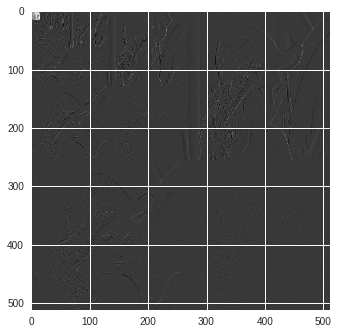

In [15]:
plt.imshow(haarLena,cmap='gray')

[4, 3, 2, 1, 0]


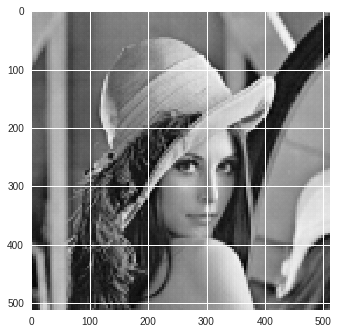

In [16]:
revHaar_dq=reverse_haar_multilevel(lena_dq,5)
plt.imshow(revHaar_dq,cmap='gray')

In [17]:
from sklearn.metrics import mean_squared_error as mse
MSE=mse(lena,revHaar_dq)
PSNR= 10 * np.log10((255^2)/MSE)
print('PSNR on quantized haar reverted',PSNR)
MSE=mse(lena,haarLena)
PSNR= 10 * np.log10((255^2)/MSE)
print('PSNR on haar reverted',PSNR)

PSNR on quantized haar reverted 2.8588756550470262
PSNR on haar reverted -18.44433217520523


Total entropy = size(i)/N * entropy(i)

size(i)/N(lena) * entropy(i) #weight(i) * entropy(i) 